<a href="https://colab.research.google.com/github/ShrutiPandey27/The_Sparks_Foundation/blob/main/sparks_task_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP INTERNSHIP-THE SPARKS FOUNDATION

##AUTHOR-Shruti Pandey

##Data Science and Business Analytics


##*Exploratory Data Analysis-Terrorism*

TASK 4






Problem Statement:
As a security /defense analyst,try to find out hot zone of terrorism.

Perform 'exploratory data analysis ' on dataset 'Global Terrorism'

What all security issues and insights you can derive by EDA?

#importing all required libraries

In [154]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [155]:
import folium
from folium.plugins import MarkerCluster

# loading data
data collection, integration, cleaning, and preprocessing. 

In [156]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Preprocessing and understanding the data

In [157]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [159]:
df.describe()

#for checking statistical values

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [160]:
#printing all the columns
df.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [161]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.041344,0.093720,-0.082972,0.137743,0.074173,0.071982,0.189245,0.079080,0.048798,-0.019084,0.097623,0.111425,-0.082822,0.156170,0.090551,0.039081,0.040647,-0.066449,-0.177867,0.017939,-0.137408,0.428397,0.141600,0.110578,0.033917,0.038996,-0.318032,-0.146094,0.398728,-0.011716,0.101733,0.101045,0.041027,0.081357,0.090000,-0.138596,0.027110,0.015351,-0.013808,0.027579,0.015282,-0.029348,0.027904,-0.278927,-0.150677,-0.013498,-0.010146,0.006369,-0.010082,-0.493414,-0.169859,-0.241986,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030

In [162]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [163]:
#printing coulumn wise information for the data frame to take further decision
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             181691 non-null  int64  
 1   iyear               181691 non-null  int64  
 2   imonth              181691 non-null  int64  
 3   iday                181691 non-null  int64  
 4   approxdate          9239 non-null    object 
 5   extended            181691 non-null  int64  
 6   resolution          2220 non-null    object 
 7   country             181691 non-null  int64  
 8   country_txt         181691 non-null  object 
 9   region              181691 non-null  int64  
 10  region_txt          181691 non-null  object 
 11  provstate           181270 non-null  object 
 12  city                181257 non-null  object 
 13  latitude            177135 non-null  float64
 14  longitude           177134 non-null  float64
 15  specificity         181685 non-nu

In [164]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','gname':'group','country_txt':'country1','region_txt':'region1','provstate':'state','city':'city','latitude':'latitude','longitude':'longitude','summary':'summary','attacktype1_txt':'attacktype','targtype1_txt':'targettype','weaptype1_txt':'weapon','nkill':'kill','nwound':'wound'},inplace=True)

#inplace allows us to save the value i.e.,updates the dataframe with required modification.
df.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             181691 non-null  int64  
 1   year                181691 non-null  int64  
 2   month               181691 non-null  int64  
 3   day                 181691 non-null  int64  
 4   approxdate          9239 non-null    object 
 5   extended            181691 non-null  int64  
 6   resolution          2220 non-null    object 
 7   country             181691 non-null  int64  
 8   country1            181691 non-null  object 
 9   region              181691 non-null  int64  
 10  region1             181691 non-null  object 
 11  state               181270 non-null  object 
 12  city                181257 non-null  object 
 13  latitude            177135 non-null  float64
 14  longitude           177134 non-null  float64
 15  specificity         181685 non-nu

In [165]:
df=df[['year','month','day','country1',"country",'nwoundus','state',"attacktype1",'region1','city','latitude','longitude','attacktype','kill','wound','target1','summary','group','targettype','weapon','motive','nkillus']]

In [166]:
df.head()

,year,month,day,country1,country,nwoundus,state,attacktype1,region1,city,latitude,longitude,attacktype,kill,wound,target1,summary,group,targettype,weapon,motive,nkillus
0,1970,7,2,Dominican Republic,58,NaN,NaN,1,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN
1,1970,0,0,Mexico,130,NaN,Federal,6,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,NaN
2,1970,1,0,Philippines,160,NaN,Tarlac,1,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN
3,1970,1,0,Greece,78,NaN,Attica,3,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,101,NaN,Fukouka,7,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [167]:
#preprocessing the data
df.isna().sum()

year                0
month               0
day                 0
country1            0
country             0
nwoundus        64702
state             421
attacktype1         0
region1             0
city              434
latitude         4556
longitude        4557
attacktype          0
kill            10313
wound           16311
target1           636
summary         66129
group               0
targettype          0
weapon              0
motive         131130
nkillus         64446
dtype: int64

In [168]:
df['wound']=df['wound'].fillna(0)
df['kill']=df['kill'].fillna(0)
df['latitude']=df['latitude'].fillna(0)
df['longitude']=df['longitude'].fillna(0)

In [169]:
df['casualities']=df['kill']+df['wound']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country1     181691 non-null  object 
 4   country      181691 non-null  int64  
 5   nwoundus     116989 non-null  float64
 6   state        181270 non-null  object 
 7   attacktype1  181691 non-null  int64  
 8   region1      181691 non-null  object 
 9   city         181257 non-null  object 
 10  latitude     181691 non-null  float64
 11  longitude    181691 non-null  float64
 12  attacktype   181691 non-null  object 
 13  kill         181691 non-null  float64
 14  wound        181691 non-null  float64
 15  target1      181055 non-null  object 
 16  summary      115562 non-null  object 
 17  group        181691 non-null  object 
 18  targettype   181691 non-

# collecting numeric columns for visualiztion

In [170]:
df.select_dtypes('number')

,year,month,day,country,nwoundus,attacktype1,latitude,longitude,kill,wound,nkillus,casualities
0,1970,7,2,58,NaN,1,18.456792,-69.951164,1.0,0.0,NaN,1.0
1,1970,0,0,130,NaN,6,19.371887,-99.086624,0.0,0.0,NaN,0.0
2,1970,1,0,160,NaN,1,15.478598,120.599741,1.0,0.0,NaN,1.0
3,1970,1,0,78,NaN,3,37.997490,23.762728,0.0,0.0,NaN,0.0
4,1970,1,0,101,NaN,7,33.580412,130.396361,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,0.0,2,2.359673,45.385034,1.0,2.0,0.0,3.0
181687,2017,12,31,200,0.0,3,35.407278,35.942679,2.0,7.0,0.0,9.0
181688,2017,12,31,160,0.0,7,6.900742,124.437908,0.0,0.0,0.0,0.0
181689,2017,12,31,92,0.0,3,24.798346,93.940430,0.0,0.0,0.0,0.0


# Number of deaths  vs database index





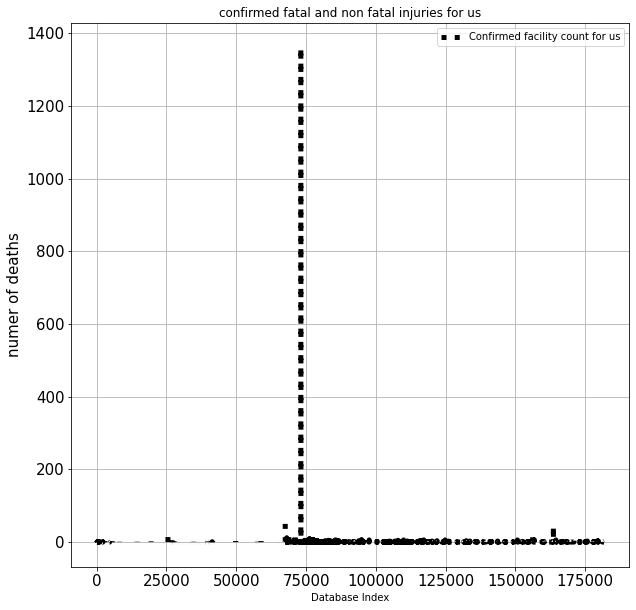

In [171]:
df.nkillus.plot(kind='line',color='black',label="Confirmed facility count for us",linewidth=5,alpha=1,grid=True,linestyle=":",figsize=(10,10),fontsize=15)
# df.nwoundus.plot(color="blue",label='non confirmed injuries for us',linewidth=5,alpha=1,grid=True,linestyle='-.',figsize=(10,10),fontsize=17)

plt.legend(loc='upper right')
plt.xlabel('Database Index',fontsize=10)
plt.ylabel("numer of deaths",fontsize=15)
plt.title("confirmed fatal and non fatal injuries for us")

plt.show()

# Number of injuries  vs database index

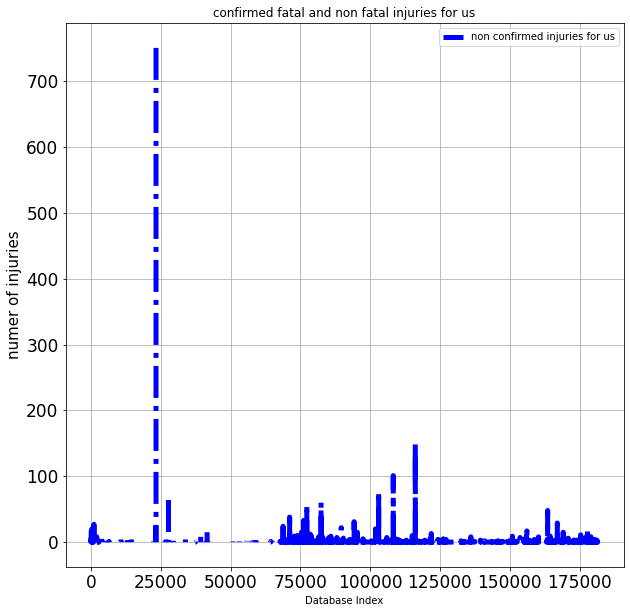

In [172]:
df.nwoundus.plot(color="blue",label='non confirmed injuries for us',linewidth=5,alpha=1,grid=True,linestyle='-.',figsize=(10,10),fontsize=17)

plt.legend(loc='upper right')
plt.xlabel('Database Index',fontsize=10)
plt.ylabel("numer of injuries",fontsize=15)
plt.title("confirmed fatal and non fatal injuries for us")

plt.show()

# Number of attacks in a year

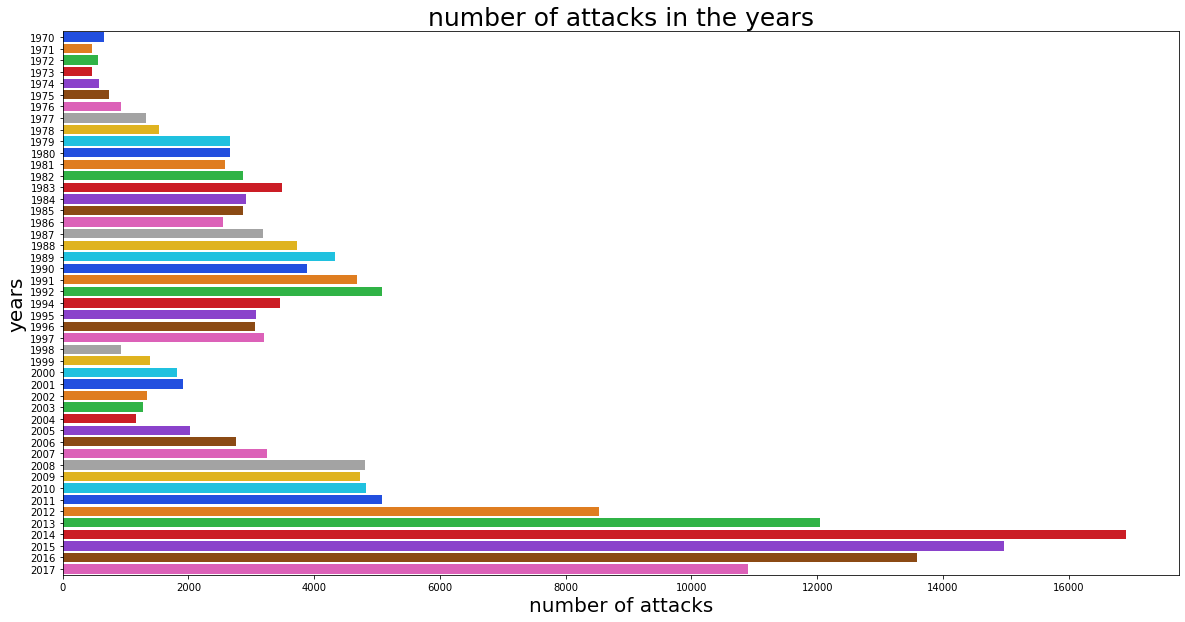

In [173]:
year=df['year'].unique()
years_count=df['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(y=year,x=years_count,palette='bright',orient='h')
plt.xticks(rotation=0)
plt.xlabel('number of attacks',fontsize=20)
plt.ylabel('years',fontsize=20)
plt.title('number of attacks in the years',fontsize=25)
plt.show()

#Terrorist activity by region each year

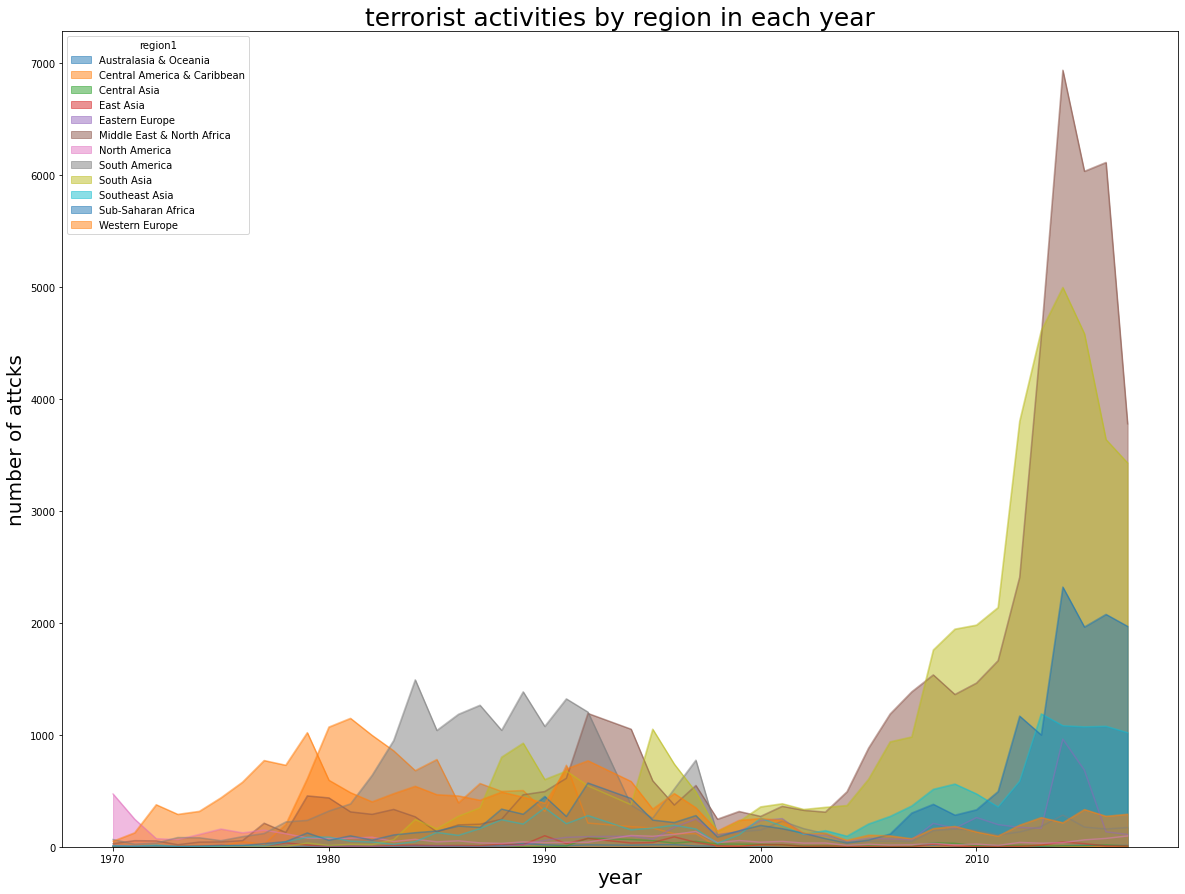

In [174]:

pd.crosstab(df.year,df.region1).plot(kind='area',stacked=False,figsize=(20,15))
plt.title('terrorist activities by region in each year',fontsize=25)
plt.ylabel('number of attcks',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.show()

#Killed and wound scatter plot

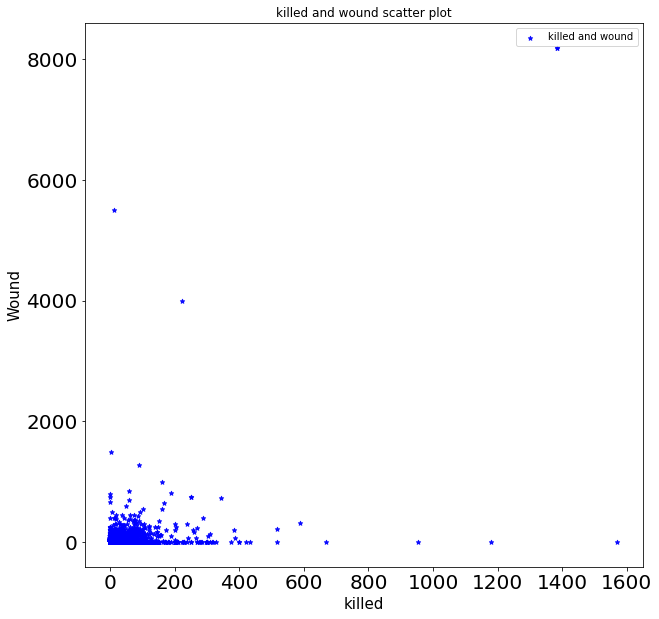

In [175]:
df.plot(kind='scatter',c='blue',marker="*",edgecolor=None,label='killed and wound',x='kill',y='wound',alpha=0.9,figsize=(10,10),fontsize=20)

plt.xlabel('killed',fontsize=15)
plt.ylabel('Wound',fontsize=15)
plt.title('killed and wound scatter plot')
plt.show()

# Frequency of terrorist actions in customized region

## *Terrorist attacks of a particular year and their locations*

In [176]:
filterYear=df['year']==1970
filterData=df[filterYear]  #filtering the data
reqFilterData=filterData.loc[:,'city':'longitude']  #we are getting the required fields 
reqFilterData=reqFilterData.dropna()  #drop NaN values in latitude and longitude
reqFilterDataList=reqFilterData.values.tolist()

In [177]:
map=folium.Map(location=[0,30],tiles='CartoDB positron',zoom_start=2)
#clusteredd marker
markerCluster=folium.plugins.MarkerCluster().add_to(map)
for point in range(0,len(reqFilterDataList)):
  folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],popup=reqFilterDataList[point][0]).add_to(markerCluster)

map

In [178]:
df.country1.value_counts()[1:20]

#to obtain 20 countries affected

Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country1, dtype: int64

In [179]:
df.group.value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

total number of people killed in terror attack

In [180]:
killData=df.loc[:,'kill']
print('number of people killed by terror attack:',int(sum(killData.dropna()))) #drop the NaN values

number of people killed by terror attack: 411868


#Top 20 affected countries

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


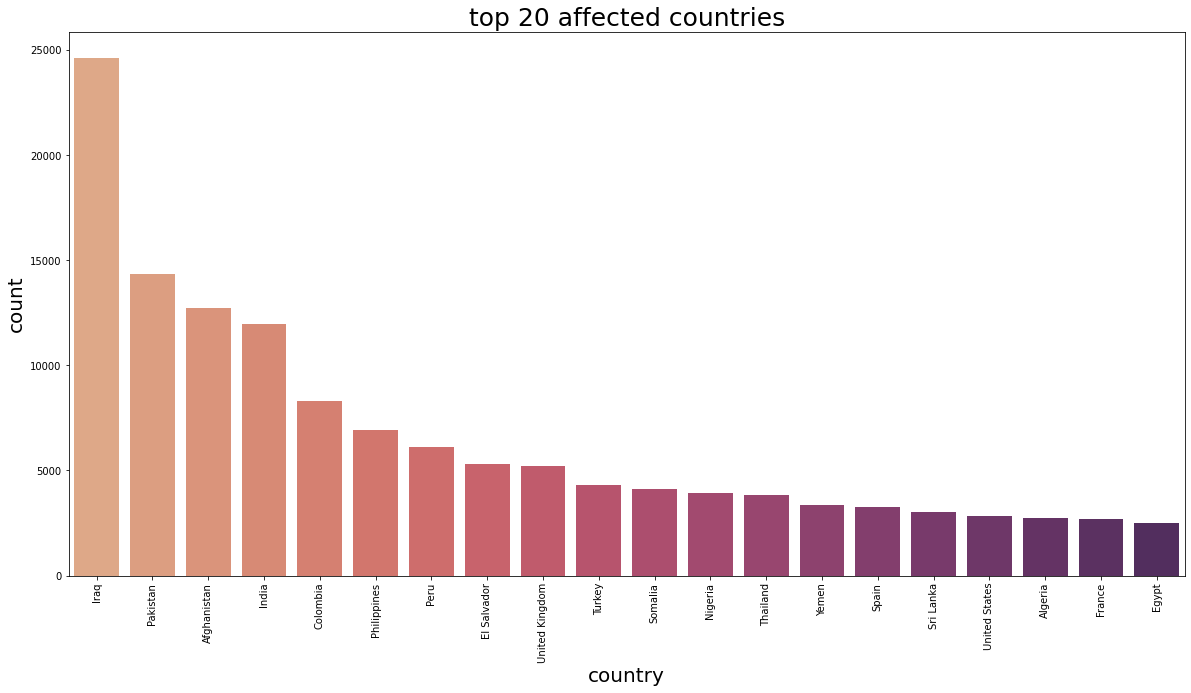

In [181]:
plt.subplots(figsize=(20,10))
sns.barplot(df['country1'].value_counts()[:20].index,df['country1'].value_counts()[:20].values,palette='flare')
plt.title('top 20 affected countries',fontsize=25)
plt.xlabel('country',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=90)
plt.show()

#Deaths due to attacks

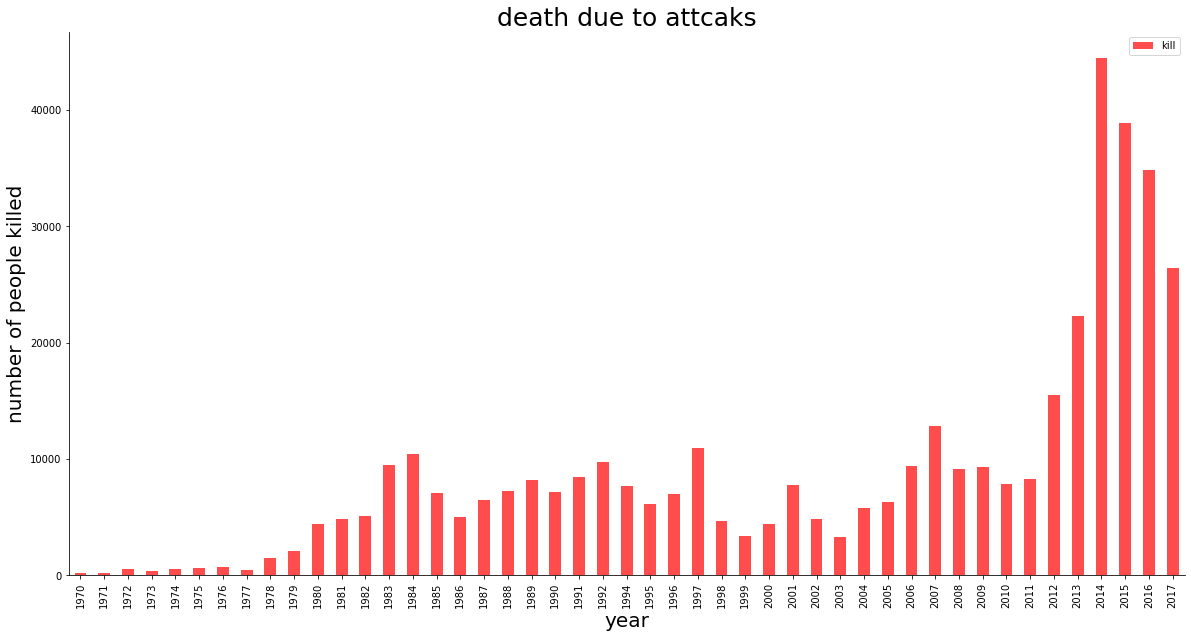

In [182]:
df1=df[['year','kill']].groupby(['year']).sum()
fig,ax4=plt.subplots(figsize=(20,10))
df1.plot(kind='bar',alpha=0.7,ax=ax4,color='red')
plt.xticks(rotation=90)
plt.title("death due to attcaks",fontsize=25)
plt.ylabel("number of people killed",fontsize=20)
plt.xlabel('year',fontsize=20)
top_side=ax4.spines["top"]
top_side.set_visible(False)
right_side=ax4.spines["right"]
right_side.set_visible(False)

#Top 20 most affected city

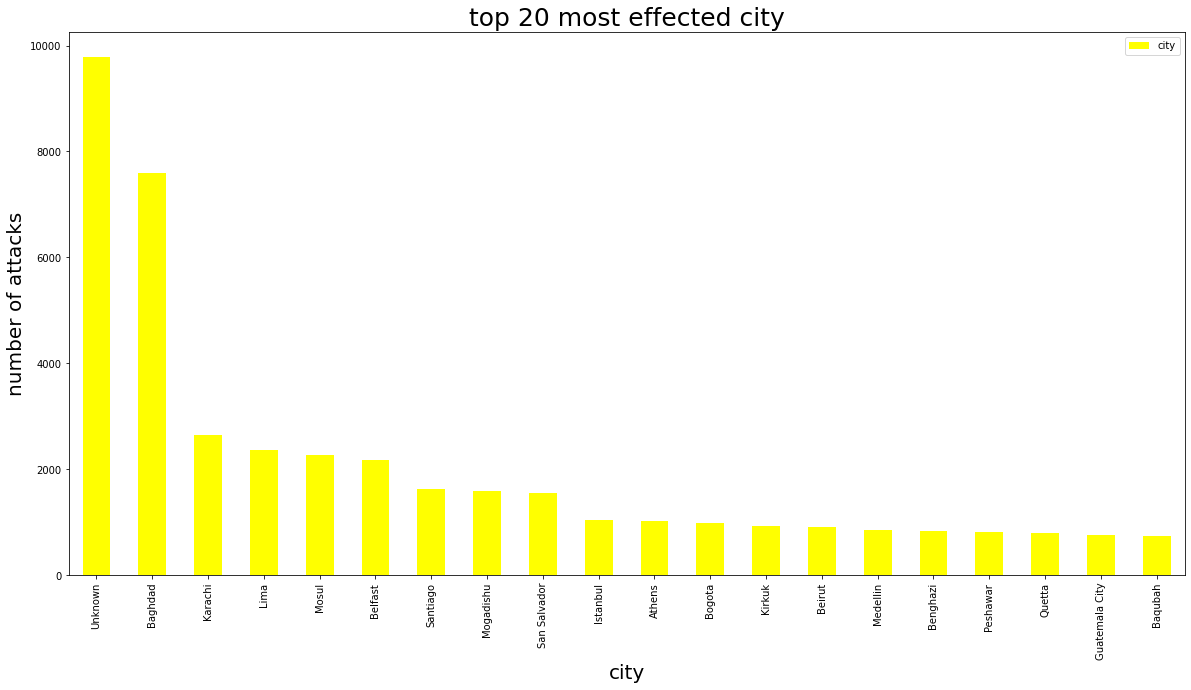

In [183]:
df['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(20).plot(kind="bar",figsize=(20,10),color='yellow')
plt.xticks(rotation=90)
plt.xlabel("city",fontsize=20)
plt.ylabel("number of attacks",fontsize=20)
plt.title("top 20 most effected city",fontsize=25)
plt.show()

#BarGraph Attack types with attack count

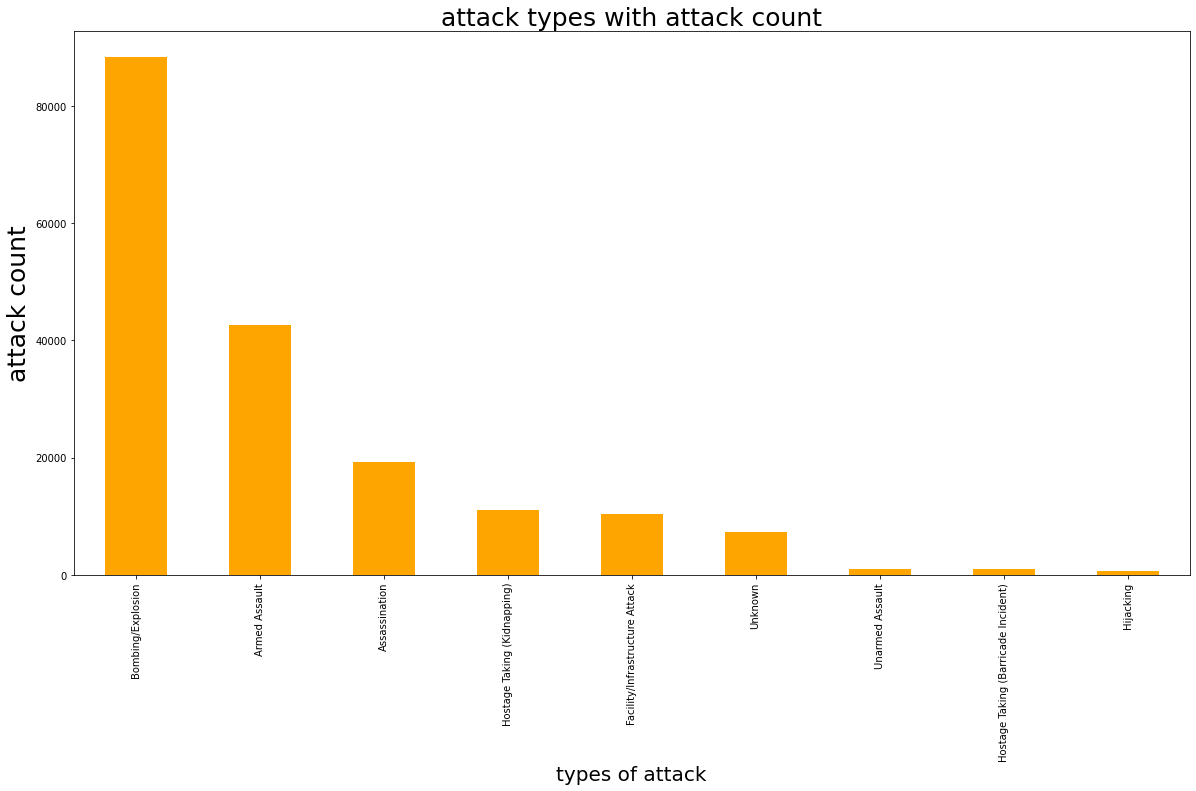

In [184]:
df['attacktype'].value_counts().plot(kind="bar",figsize=(20,10),color="orange")
plt.xticks(rotation=90)
plt.xlabel("types of attack",fontsize=20)
plt.ylabel("attack count",fontsize=25)
plt.title("attack types with attack count",fontsize=25)
plt.show()

#Number of people killed due to different attacks

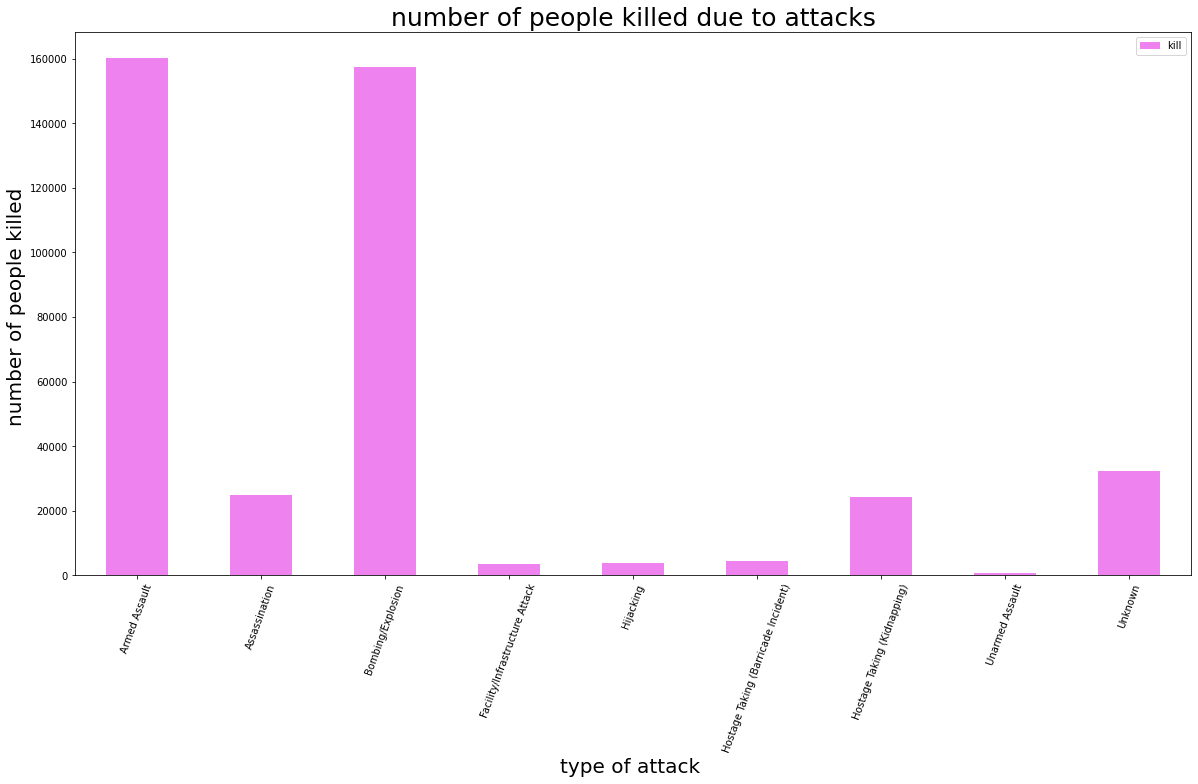

In [185]:
df[['attacktype','kill']].groupby(["attacktype"],axis=0).sum().plot(kind="bar",figsize=(20,10),color=["violet"])
plt.xticks(rotation=70)
plt.title("number of people killed due to attacks",fontsize=25)
plt.ylabel("number of people killed ",fontsize=20)
plt.xlabel('type of attack ',fontsize=20)
plt.show()

#Number of people wounded due to attack

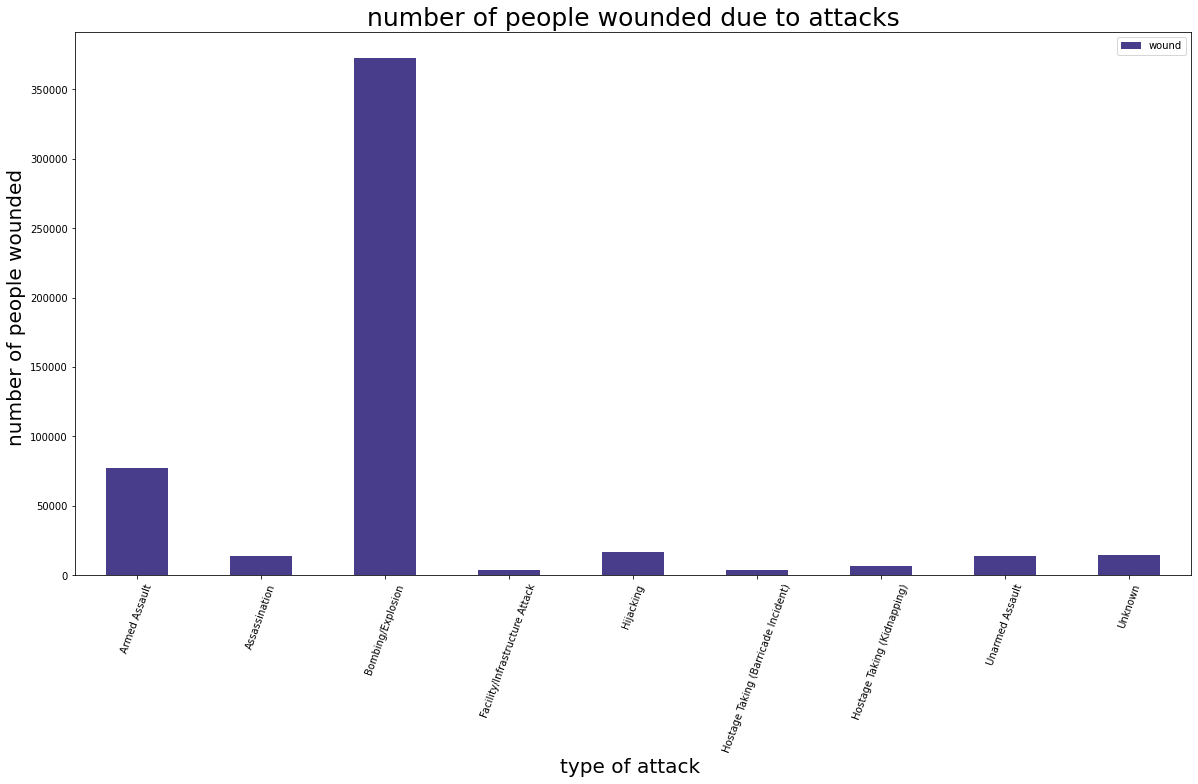

In [186]:
df[['attacktype','wound']].groupby(["attacktype"],axis=0).sum().plot(kind="bar",figsize=(20,10),color=["darkslateblue"])
plt.xticks(rotation=70)
plt.title("number of people wounded due to attacks",fontsize=25)
plt.ylabel("number of people wounded ",fontsize=20)
plt.xlabel('type of attack ',fontsize=20)
plt.show()

#number of attacks in different target areas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


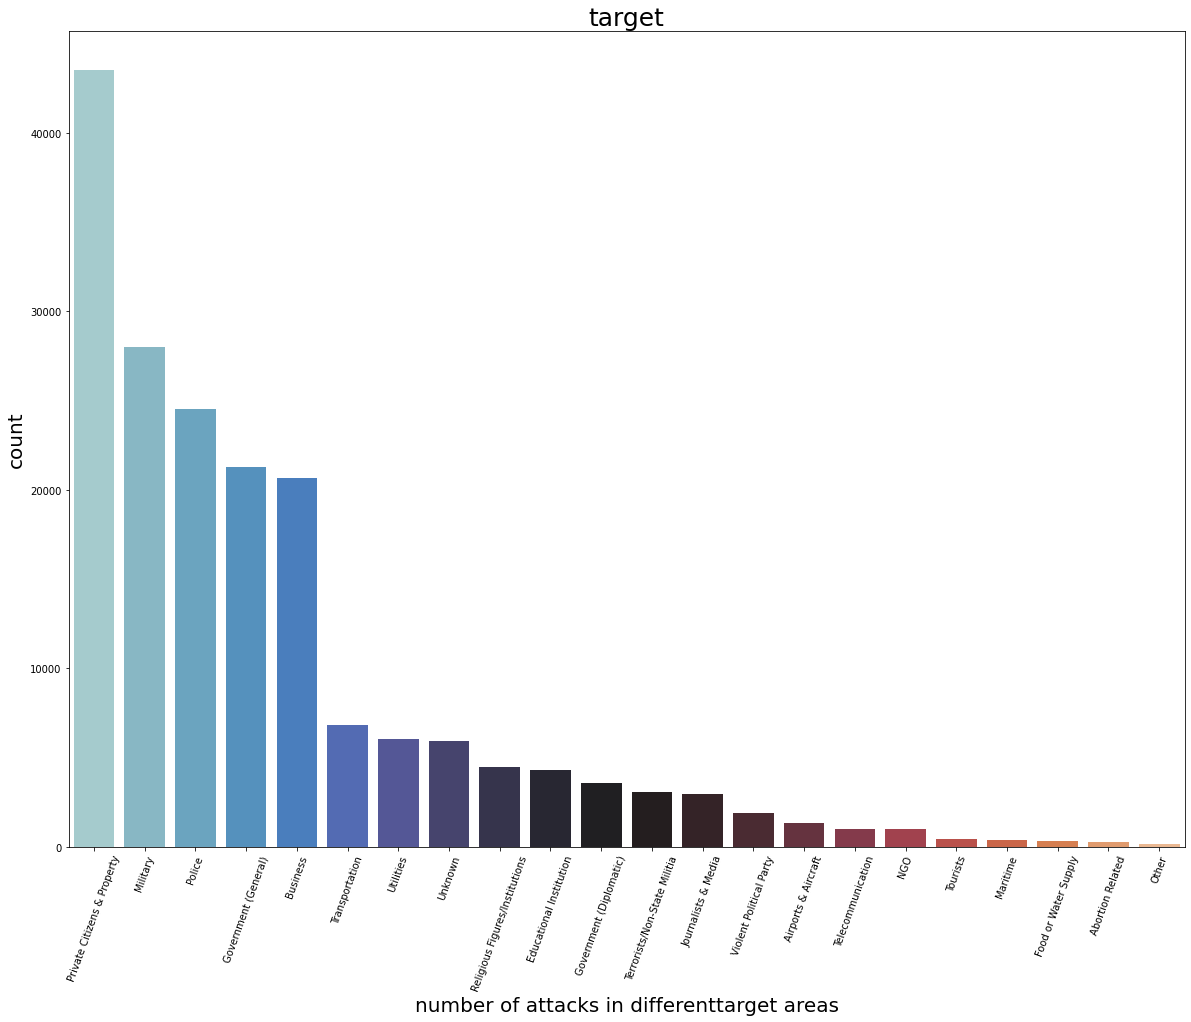

In [187]:
plt.subplots(figsize=(20,15))

sns.countplot(df['targettype'],order=df['targettype'].value_counts().index,palette='icefire');
plt.xticks(rotation=70)
plt.title("target",fontsize=25)
plt.ylabel("count",fontsize=20)
plt.xlabel('number of attacks in different target areas',fontsize=20)
plt.show()

#Attack count by terrorist groups

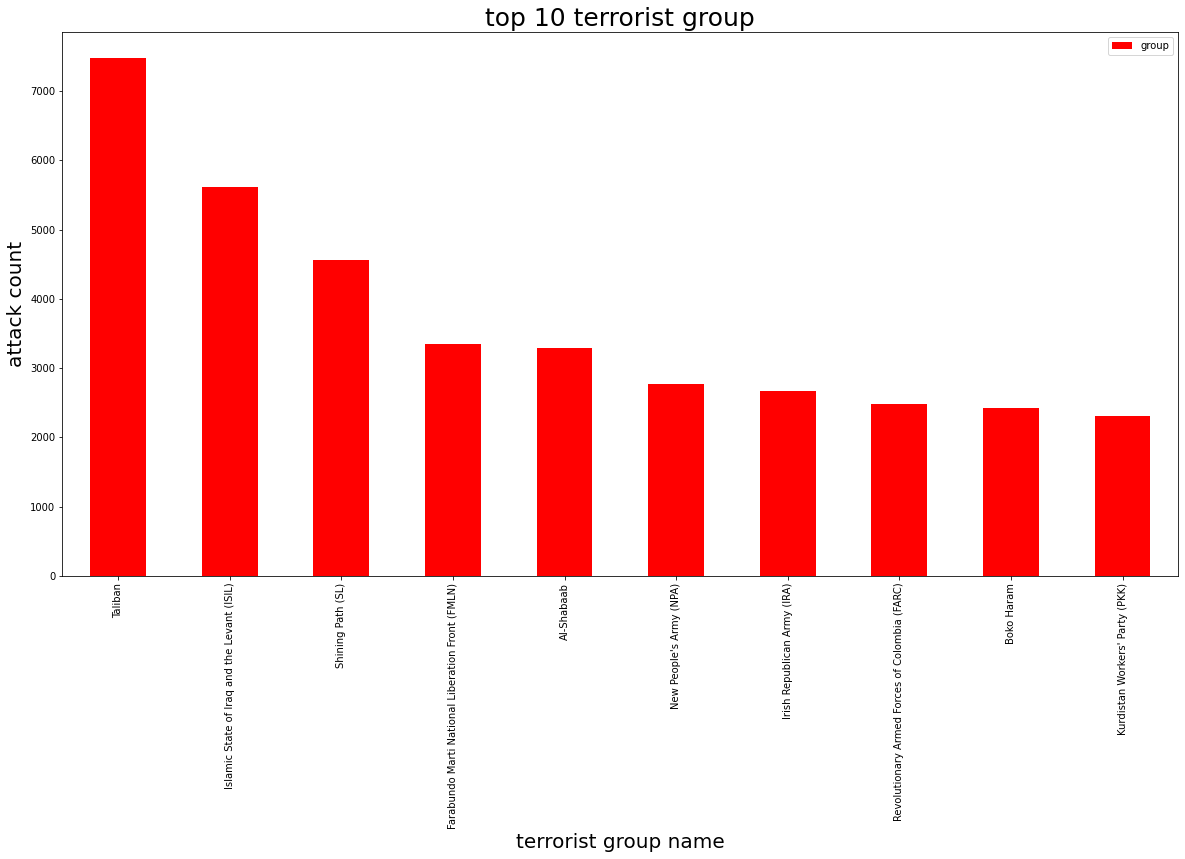

In [188]:
df['group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("top 10 terrorist group",fontsize=25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("attack count",fontsize=20)
plt.show()

#Number of people killed in a terrorist group

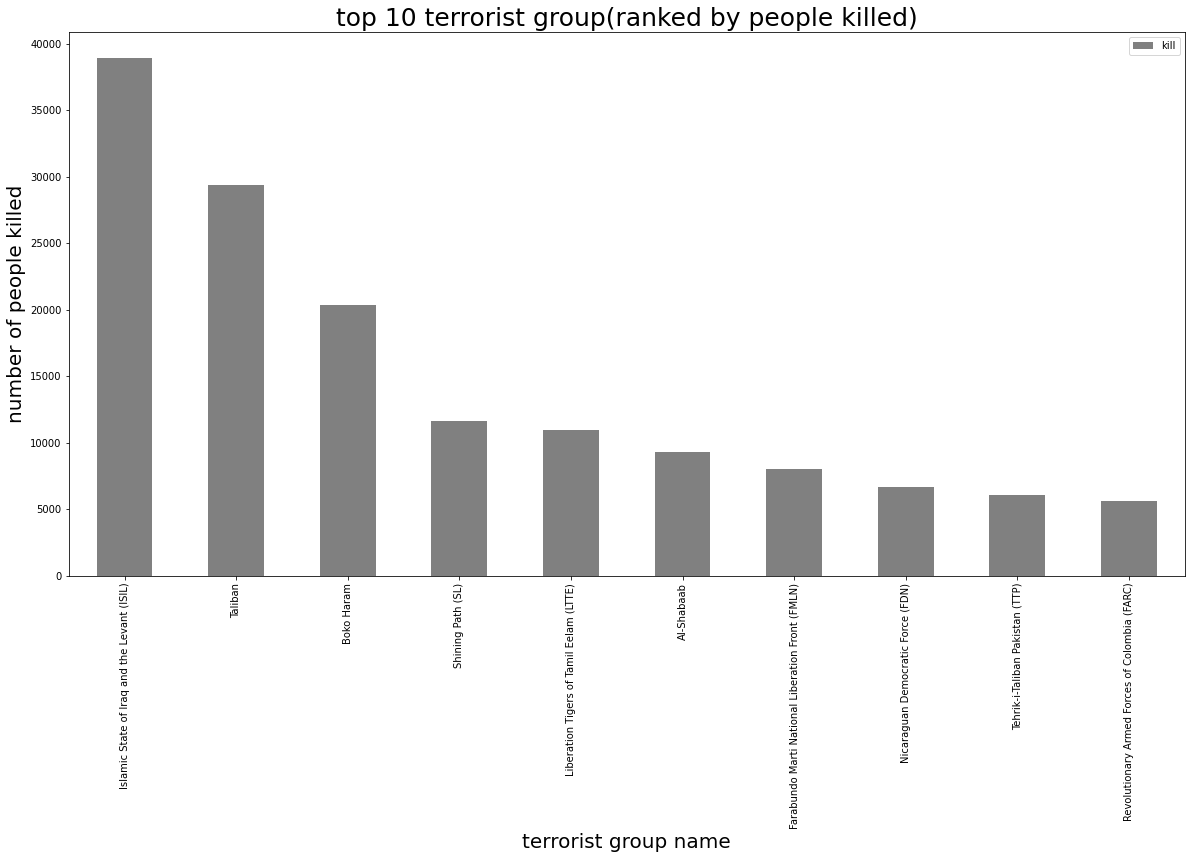

In [189]:
df[['group','kill']].groupby(['group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='gray',figsize=(20,10))
plt.title("top 10 terrorist group(ranked by people killed)",fontsize=25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("number of people killed",fontsize=20)
plt.show()

In [190]:
#by what types of attacks these deaths happended

attackData=df.loc[:,'attacktype1':'attacktype']
typeKillData=pd.concat([attackData,killData],axis=1)

In [191]:
typeKillFormData=typeKillData.pivot_table(columns='attacktype',values='kill',aggfunc='sum')
typeKillFormData

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [192]:
typeKillFormData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, kill to kill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


#Types of Terrrorist attacks that cause harm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


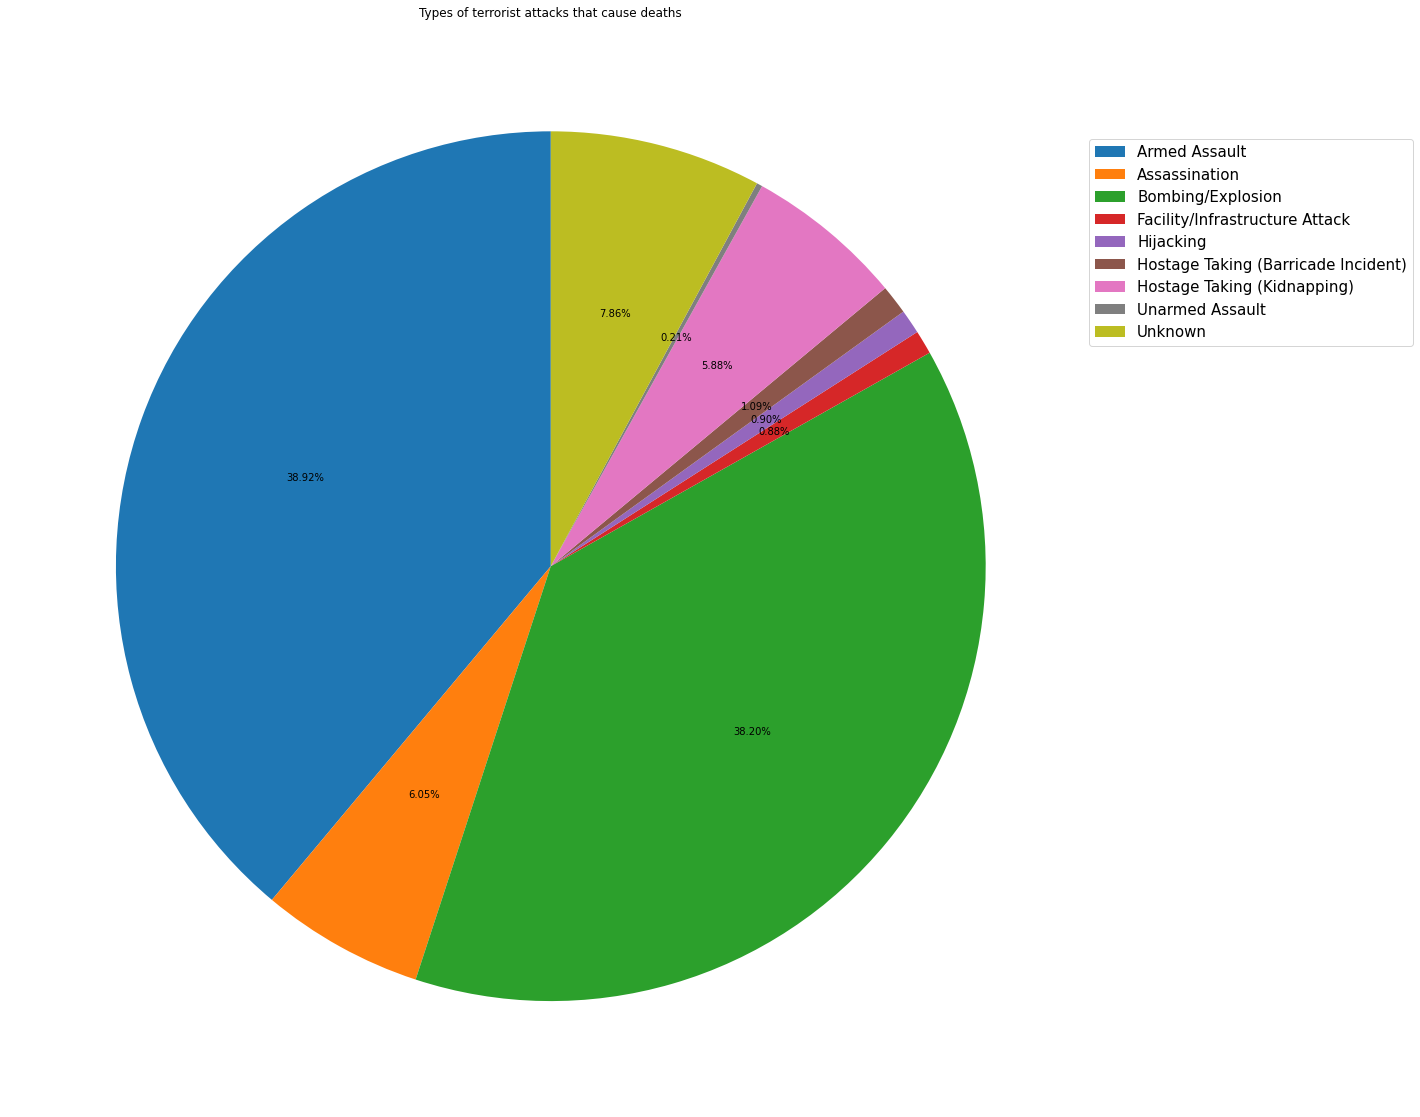

In [193]:
labels=typeKillFormData.columns.tolist()  #convert line to list
transpoze = typeKillFormData.T  #transpoze

values=transpoze.values.tolist()
fig,ax=plt.subplots(figsize=(20,20),subplot_kw=dict(aspect='equal'))
plt.pie(values,startangle=90,autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels,loc="upper right",bbox_to_anchor=(1.3,0.9),fontsize=15)  #location legend
plt.show()

Armed assault and bombing/explosion are seen to be the cause of 77% of deaths in these attacks.This rate is why these attacks are used so many times in terrorist actions.This is how dangerous weapons and explosives are to world.

# number of people killed in terrorist attack by countries

In [204]:
countryData=df.loc[:,'country1':'country']
countryKillData=pd.concat([countryData,killData],axis=1)

countryKillFormatData=countryKillData.pivot_table(columns='country1',values='kill',aggfunc='sum')
countryKillFormatData

country1,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,...,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [205]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, kill to kill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


In [206]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams['figure.figsize']=fig_size

#Number of people killed by terrorist in a specific country

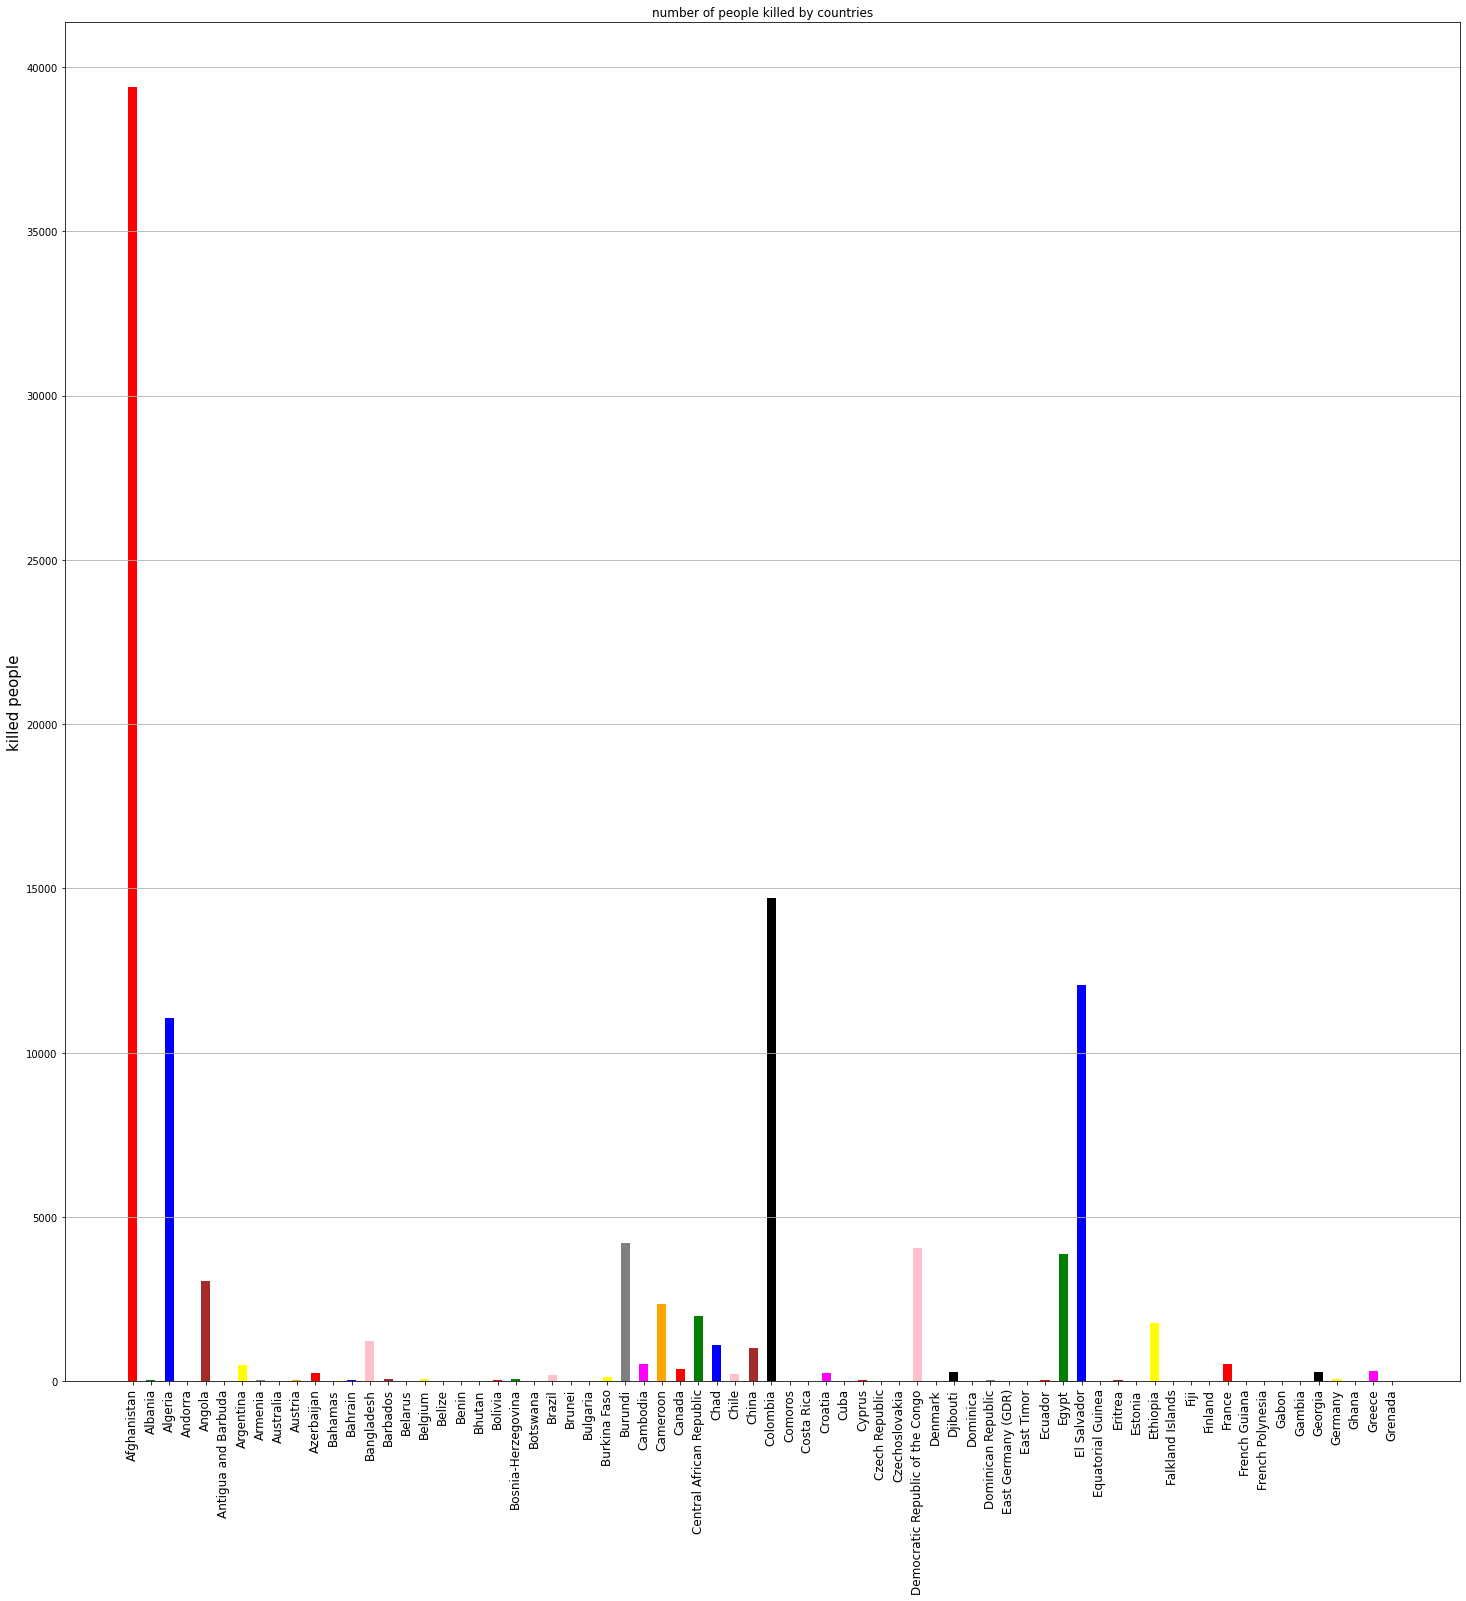

In [207]:
labels=countryKillFormatData.columns.tolist()
labels=labels[:70]
index=np.arange(len(labels))
transpoze=countryKillFormatData.T
values=transpoze.values.tolist()
values=values[:70]
values=[int(i[0]) for i in values]  #convert float to int
colors=['red','green','blue','pink','brown','black','yellow','gray','magenta','orange']
fig,ax=plt.subplots(1,1)
ax.yaxis.grid(True)
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"]=fig_size
plt.bar(index,values,color=colors,width=0.5)
plt.ylabel('killed people',fontsize=15)
plt.xlabel('country',fontsize=15)
plt.xticks(index,labels,fontsize=12,rotation=90)
plt.title("number of people killed by countries")
plt.show()

Conclusion and Results


*   most vulnerable city:Baghdad
*   most vulnerable country :Iraq
*   most vulnerable region to attacks:Middle East and North Africa

* Year with most attacks:2014
* month with most attacks:5(May)
* Group with most attacks:Taliban
* Type of attack mostly used:Bombing/Explosion

